In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
from scipy import stats
import os
import matplotlib.pyplot as plt

In [2]:
# Output the allyears dataframe for further analysis
outdatapath = os.path.join('..','output_data',f"AllMeansAndTests.csv")
all_years=pd.read_csv(outdatapath)
all_years.head()

,Year,Count in Smoking HH,Asthma Rate in Smoking HH,Count Asthma in Smoking HH,Asthmatic Child Difference P-Value for Smoking Status,Asthmatic Child Difference Significant for Smoking Status,Autism Rate in Smoking HH,Count Autism in Smoking HH,Autistic Child Difference P-Value for Smoking Status,Autistic Child Difference Significant for Smoking Status,...,Asthma Rate in Non-Smoking Non-Impoverished HH,Count Asthma in Non-Smoking Non-Impoverished HH,Autism Rate in Non-Smoking Non-Impoverished HH,Count Autism in Non-Smoking Non-Impoverished HH,ADHD/ADD Rate in Non-Smoking Non-Impoverished HH,Count ADHD/ADD in Non-Smoking Non-Impoverished HH,Count Concentration/Emotional/Behavior in Non-Smoking Non-Impoverished HH,Concentration/Emotional/Behavior Rate in Non-Smoking Non-Impoverished HH,Percent in Smoking Non-Impoverished HH,Percent in Non-Smoking Non-Impoverished HH
0,2006,1727,17.081644,295,0.000009,Yes,0.405327,7,0.115221,No,...,12.245253,703,0.731580,42,5.277826,303,767,13.360042,19.231851,80.768149
1,2007,1415,17.667845,250,0.000004,Yes,0.636042,9,0.937558,No,...,12.058879,639,0.717116,38,4.868843,258,657,12.398566,16.773991,83.226009
2,2008,1450,17.517241,254,0.000163,Yes,0.896552,13,0.583443,No,...,12.853799,604,0.808683,38,6.107682,287,595,12.662269,18.660204,81.339796
3,2009,1846,18.093174,334,0.000002,Yes,1.462622,27,0.057217,No,...,12.796525,766,0.935516,56,5.529569,331,703,11.744069,17.763429,82.236571
4,2010,1700,15.882353,270,0.011216,Yes,1.235294,21,0.166156,No,...,13.142563,767,0.873886,51,5.894448,344,854,14.633310,17.031561,82.968439


<IPython.core.display.Javascript object>


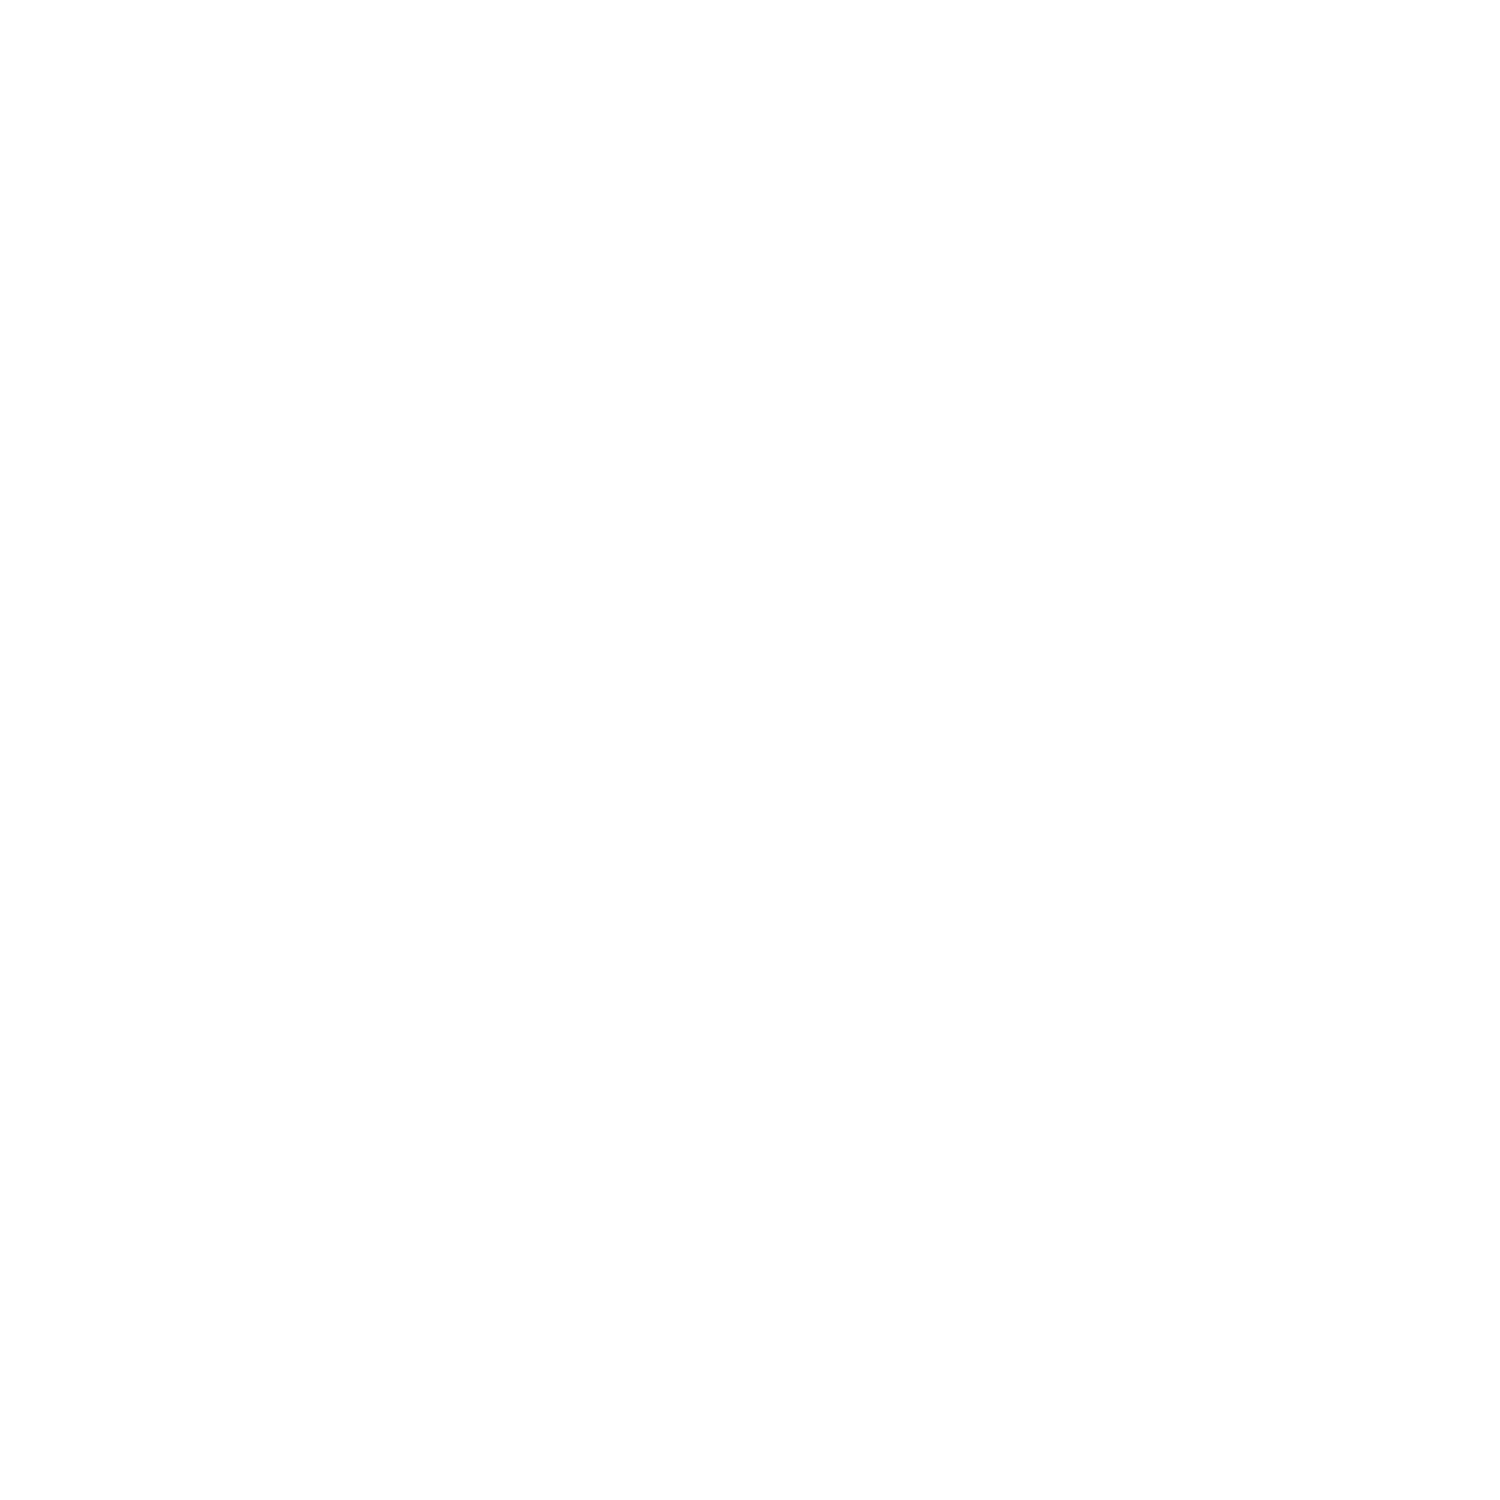

<IPython.core.display.Javascript object>


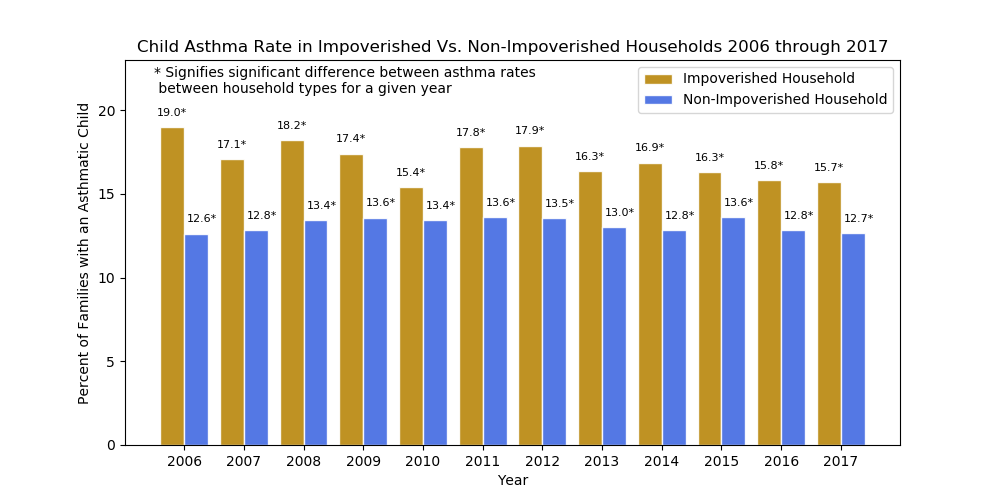

In [29]:
plt.figure(figsize=(15,15))

# Set x axis and tick locations()
x_axis = np.arange(2006,2018)
tick_locations = [value for value in x_axis]

# set bar width
barwidth = 0.4

# set height of bar
pov_asthma_bar = all_years["Asthma Rate in Impoverished HH"].tolist()
nonpov_asthma_bar = all_years["Asthma Rate in Non-Impoverished HH"].tolist()
siglist = all_years["Asthmatic Child Difference Significant for Poverty Status"].tolist()

# set position of the bar on the x-axis
r1 = [x - 0.5*barwidth for x in tick_locations]
r2 = [x + 0.5*barwidth for x in tick_locations]

plt.figure(figsize=(10,5))
plt.bar(r1, pov_asthma_bar, color='darkgoldenrod', alpha = 0.9, align="center", width=barwidth, edgecolor = 'white', label="Impoverished Household")
plt.bar(r2, nonpov_asthma_bar, color='royalblue', alpha = 0.9, align="center", width=barwidth, edgecolor = 'white', label="Non-Impoverished Household")
plt.xticks(tick_locations,all_years['Year'].tolist())
plt.title("Child Asthma Rate in Impoverished Vs. Non-Impoverished Households 2006 through 2017")
plt.ylim(0,23)

plt.legend()

place = -1

for x,y in zip(x_axis,pov_asthma_bar):

    place = place + 1
    
    if siglist[place]=="Yes":
        label = "{:.1f}*".format(y)
    else:
        label = "{:.1f}".format(y)

    plt.annotate(label, # this is the text
                 (r1[place],y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,8), # distance from text to points (x,y)
                 ha='center',
                 fontsize=8) # horizontal alignment can be left, right or center

place = -1

for x,y in zip(x_axis,nonpov_asthma_bar):

    place = place + 1
    
    if siglist[place]=="Yes":
        label = "{:.1f}*".format(y)
    else:
        label = "{:.1f}".format(y)

    plt.annotate(label, # this is the text
                 (r2[place]+0.1,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,8), # distance from text to points (x,y)
                 ha='center',
                 fontsize=8) # horizontal alignment can be left, right or center
plt.text(2005.5,21,"* Signifies significant difference between asthma rates \n between household types for a given year",
        fontsize=10)
plt.xlabel("Year")
plt.ylabel("Percent of Families with an Asthmatic Child")

# Save the Figure
plt.savefig(f"../Images/AsthmaVsPoverty.png")

plt.show()

<IPython.core.display.Javascript object>


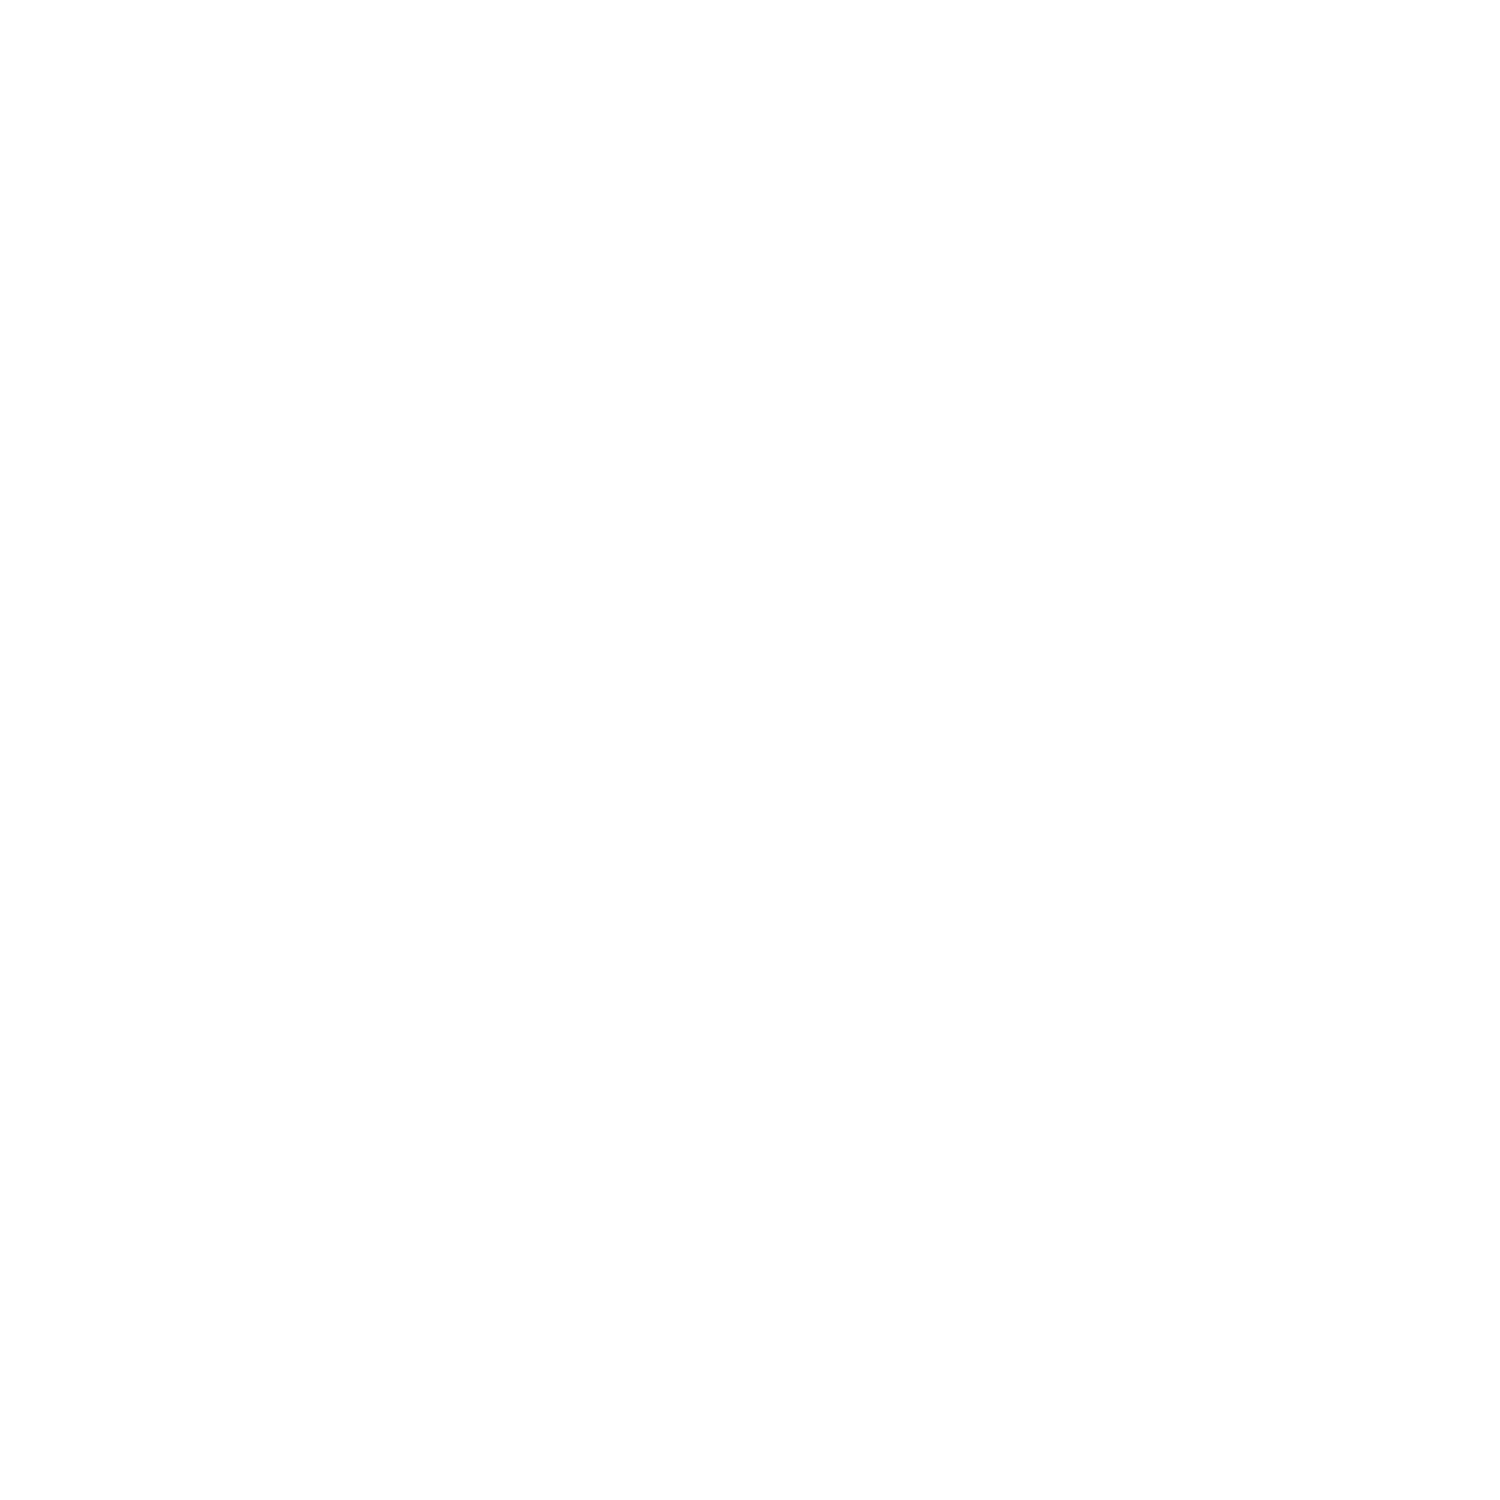

<IPython.core.display.Javascript object>


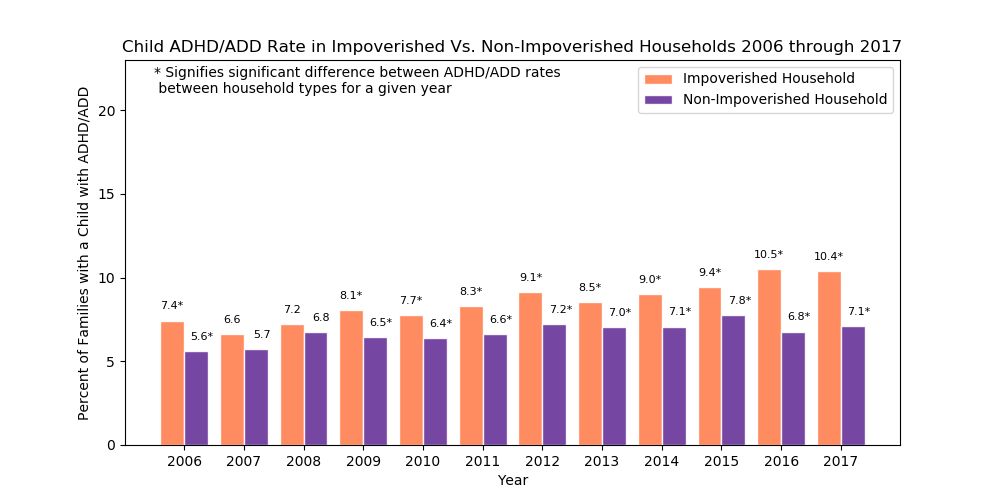

In [28]:
plt.figure(figsize=(15,15))

# Set x axis and tick locations()
x_axis = np.arange(2006,2018)
tick_locations = [value for value in x_axis]

# set bar width
barwidth = 0.4

# set height of bar
pov_adhd_bar = all_years["ADHD/ADD Rate in Impoverished HH"].tolist()
nonpov_adhd_bar = all_years["ADHD/ADD Rate in Non-Impoverished HH"].tolist()
siglist = all_years["ADHD/ADD Child Difference Significant for Poverty Status"].tolist()

# set position of the bar on the x-axis
r1 = [x - 0.5*barwidth for x in tick_locations]
r2 = [x + 0.5*barwidth for x in tick_locations]

plt.figure(figsize=(10,5))
plt.bar(r1, pov_adhd_bar, color='coral', alpha = 0.9, align="center", width=barwidth, edgecolor = 'white', label="Impoverished Household")
plt.bar(r2, nonpov_adhd_bar, color='rebeccapurple', alpha = 0.9, align="center", width=barwidth, edgecolor = 'white', label="Non-Impoverished Household")
plt.xticks(tick_locations,all_years['Year'].tolist())
plt.title("Child ADHD/ADD Rate in Impoverished Vs. Non-Impoverished Households 2006 through 2017")
plt.ylim(0,23)

plt.legend()

place = -1

for x,y in zip(x_axis,pov_adhd_bar):

    place = place + 1
    
    if siglist[place]=="Yes":
        label = "{:.1f}*".format(y)
    else:
        label = "{:.1f}".format(y)

    plt.annotate(label, # this is the text
                 (r1[place],y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,8), # distance from text to points (x,y)
                 ha='center',
                 fontsize=8) # horizontal alignment can be left, right or center

place = -1

for x,y in zip(x_axis,nonpov_adhd_bar):

    place = place + 1
    
    if siglist[place]=="Yes":
        label = "{:.1f}*".format(y)
    else:
        label = "{:.1f}".format(y)

    plt.annotate(label, # this is the text
                 (r2[place]+0.1,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,8), # distance from text to points (x,y)
                 ha='center',
                 fontsize=8) # horizontal alignment can be left, right or center
plt.text(2005.5,21,"* Signifies significant difference between ADHD/ADD rates \n between household types for a given year",
        fontsize=10)
plt.xlabel("Year")
plt.ylabel("Percent of Families with a Child with ADHD/ADD")

# Save the Figure
plt.savefig(f"../Images/ADHD_ADDVsPoverty.png")

plt.show()

<IPython.core.display.Javascript object>


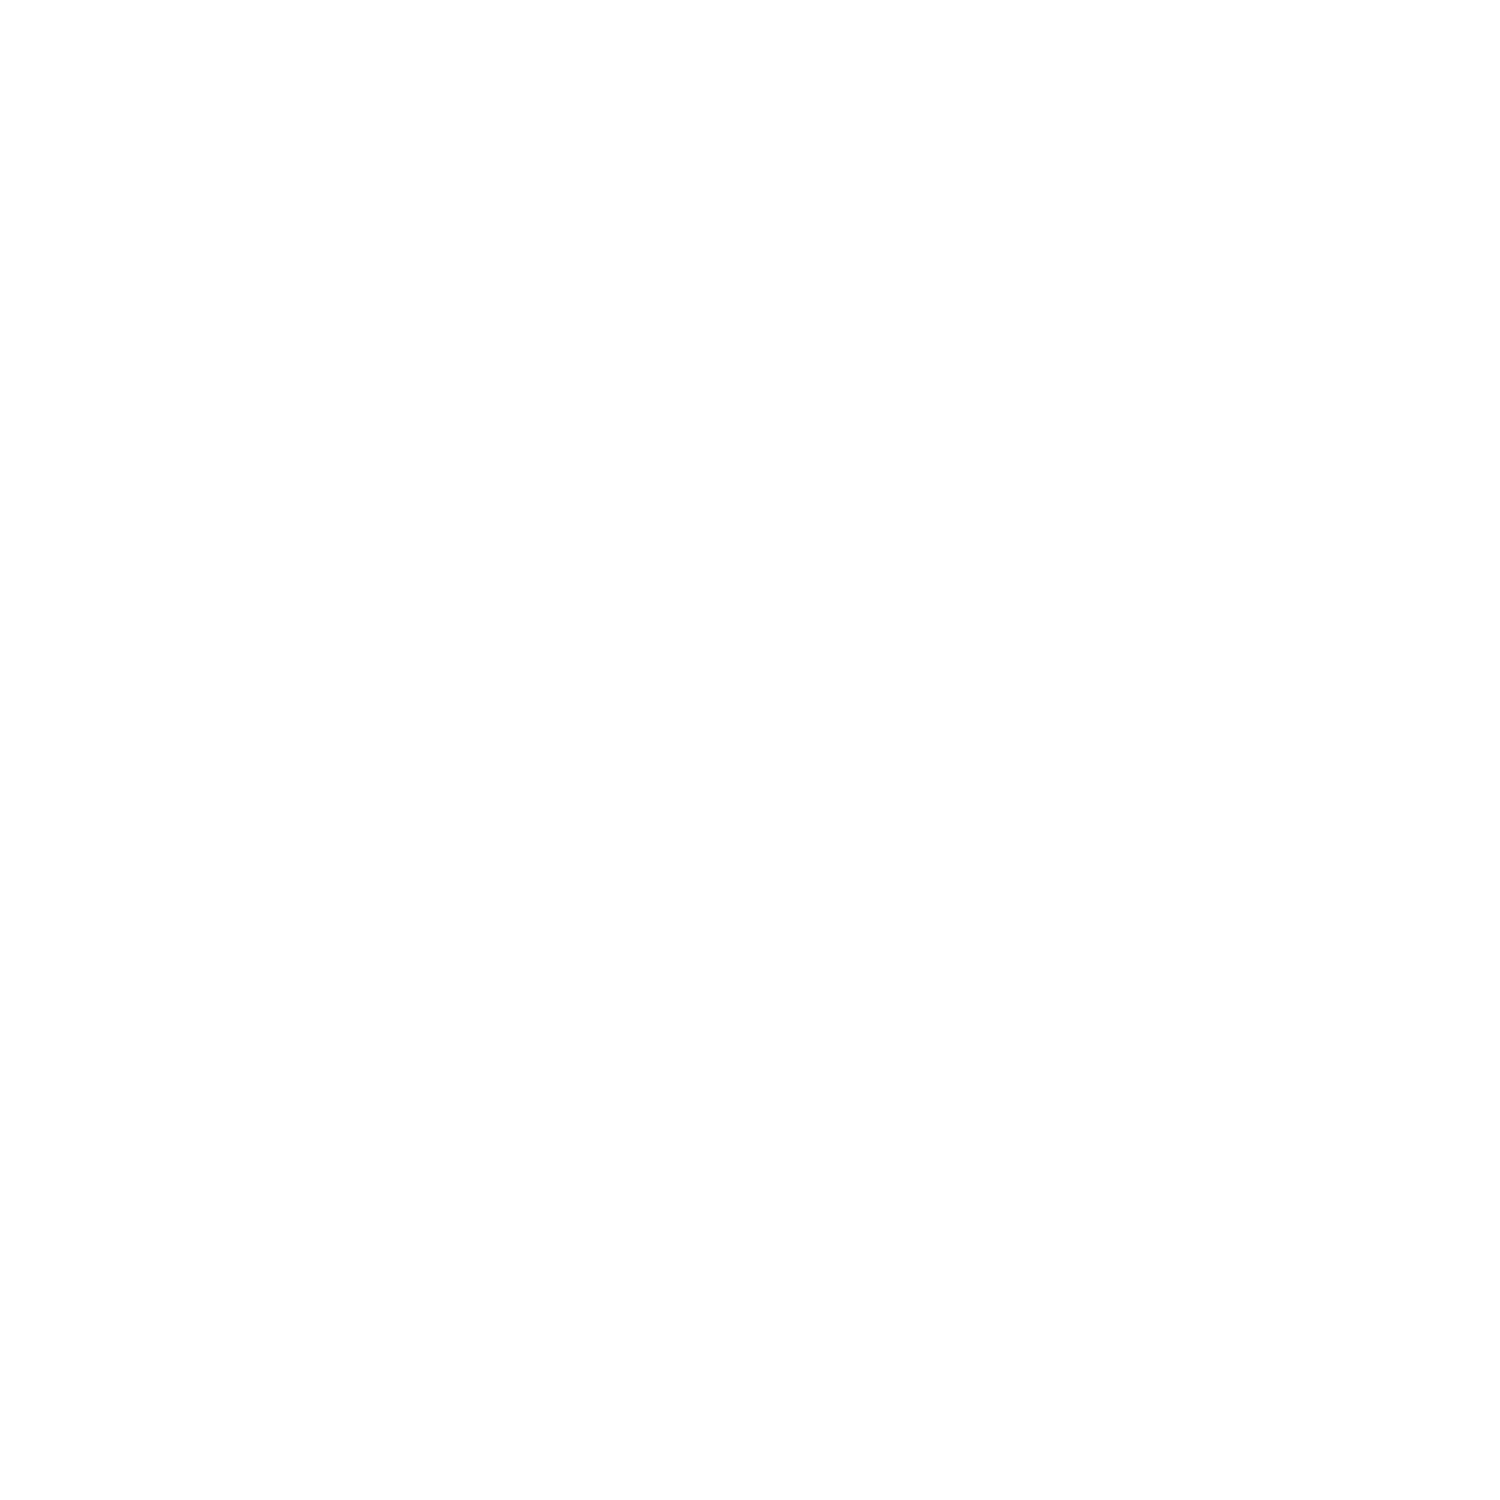

<IPython.core.display.Javascript object>


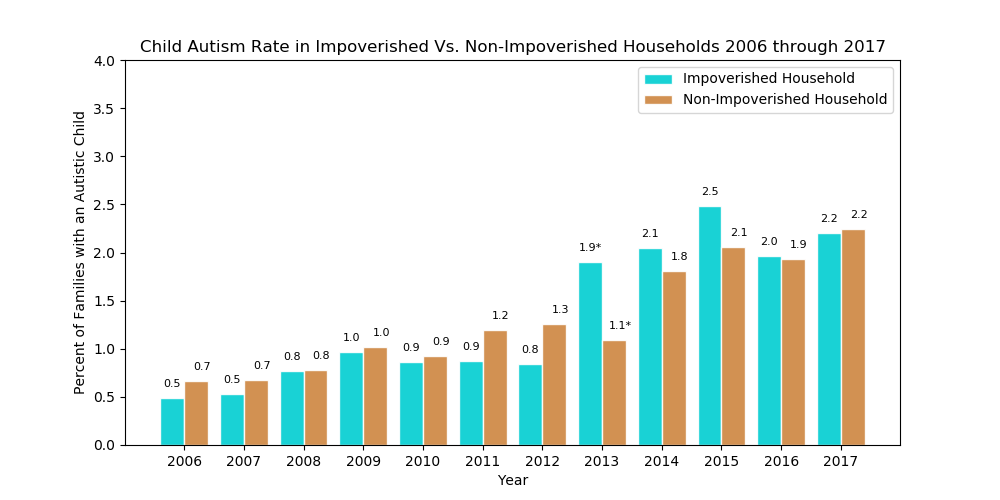

In [26]:
plt.figure(figsize=(15,15))

# Set x axis and tick locations()
x_axis = np.arange(2006,2018)
tick_locations = [value for value in x_axis]

# set bar width
barwidth = 0.4

# set height of bar
pov_autism_bar = all_years["Autism Rate in Impoverished HH"].tolist()
nonpov_autism_bar = all_years["Autism Rate in Non-Impoverished HH"].tolist()
siglist = all_years["Autistic Child Difference Significant for Poverty Status"].tolist()

# set position of the bar on the x-axis
r1 = [x - 0.5*barwidth for x in tick_locations]
r2 = [x + 0.5*barwidth for x in tick_locations]

plt.figure(figsize=(10,5))
plt.bar(r1, pov_autism_bar, color='darkturquoise', alpha = 0.9, align="center", width=barwidth, edgecolor = 'white', label="Impoverished Household")
plt.bar(r2, nonpov_autism_bar, color='peru', alpha = 0.9, align="center", width=barwidth, edgecolor = 'white', label="Non-Impoverished Household")
plt.xticks(tick_locations,all_years['Year'].tolist())
plt.title("Child Autism Rate in Impoverished Vs. Non-Impoverished Households 2006 through 2017")
plt.ylim(0,4)

plt.legend()

place = -1

for x,y in zip(x_axis,pov_autism_bar):

    place = place + 1
    
    if siglist[place]=="Yes":
        label = "{:.1f}*".format(y)
    else:
        label = "{:.1f}".format(y)

    plt.annotate(label, # this is the text
                 (r1[place],y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,8), # distance from text to points (x,y)
                 ha='center',
                 fontsize=8) # horizontal alignment can be left, right or center

place = -1

for x,y in zip(x_axis,nonpov_autism_bar):

    place = place + 1
    
    if siglist[place]=="Yes":
        label = "{:.1f}*".format(y)
    else:
        label = "{:.1f}".format(y)

    plt.annotate(label, # this is the text
                 (r2[place]+0.1,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,8), # distance from text to points (x,y)
                 ha='center',
                 fontsize=8) # horizontal alignment can be left, right or center
plt.text(2005.5,21,"* Signifies significant difference between autism rates \n between household types for a given year",
        fontsize=10)
plt.xlabel("Year")
plt.ylabel("Percent of Families with an Autistic Child")

# Save the Figure
plt.savefig(f"../Images/AutismVsPoverty.png")

plt.show()

<IPython.core.display.Javascript object>


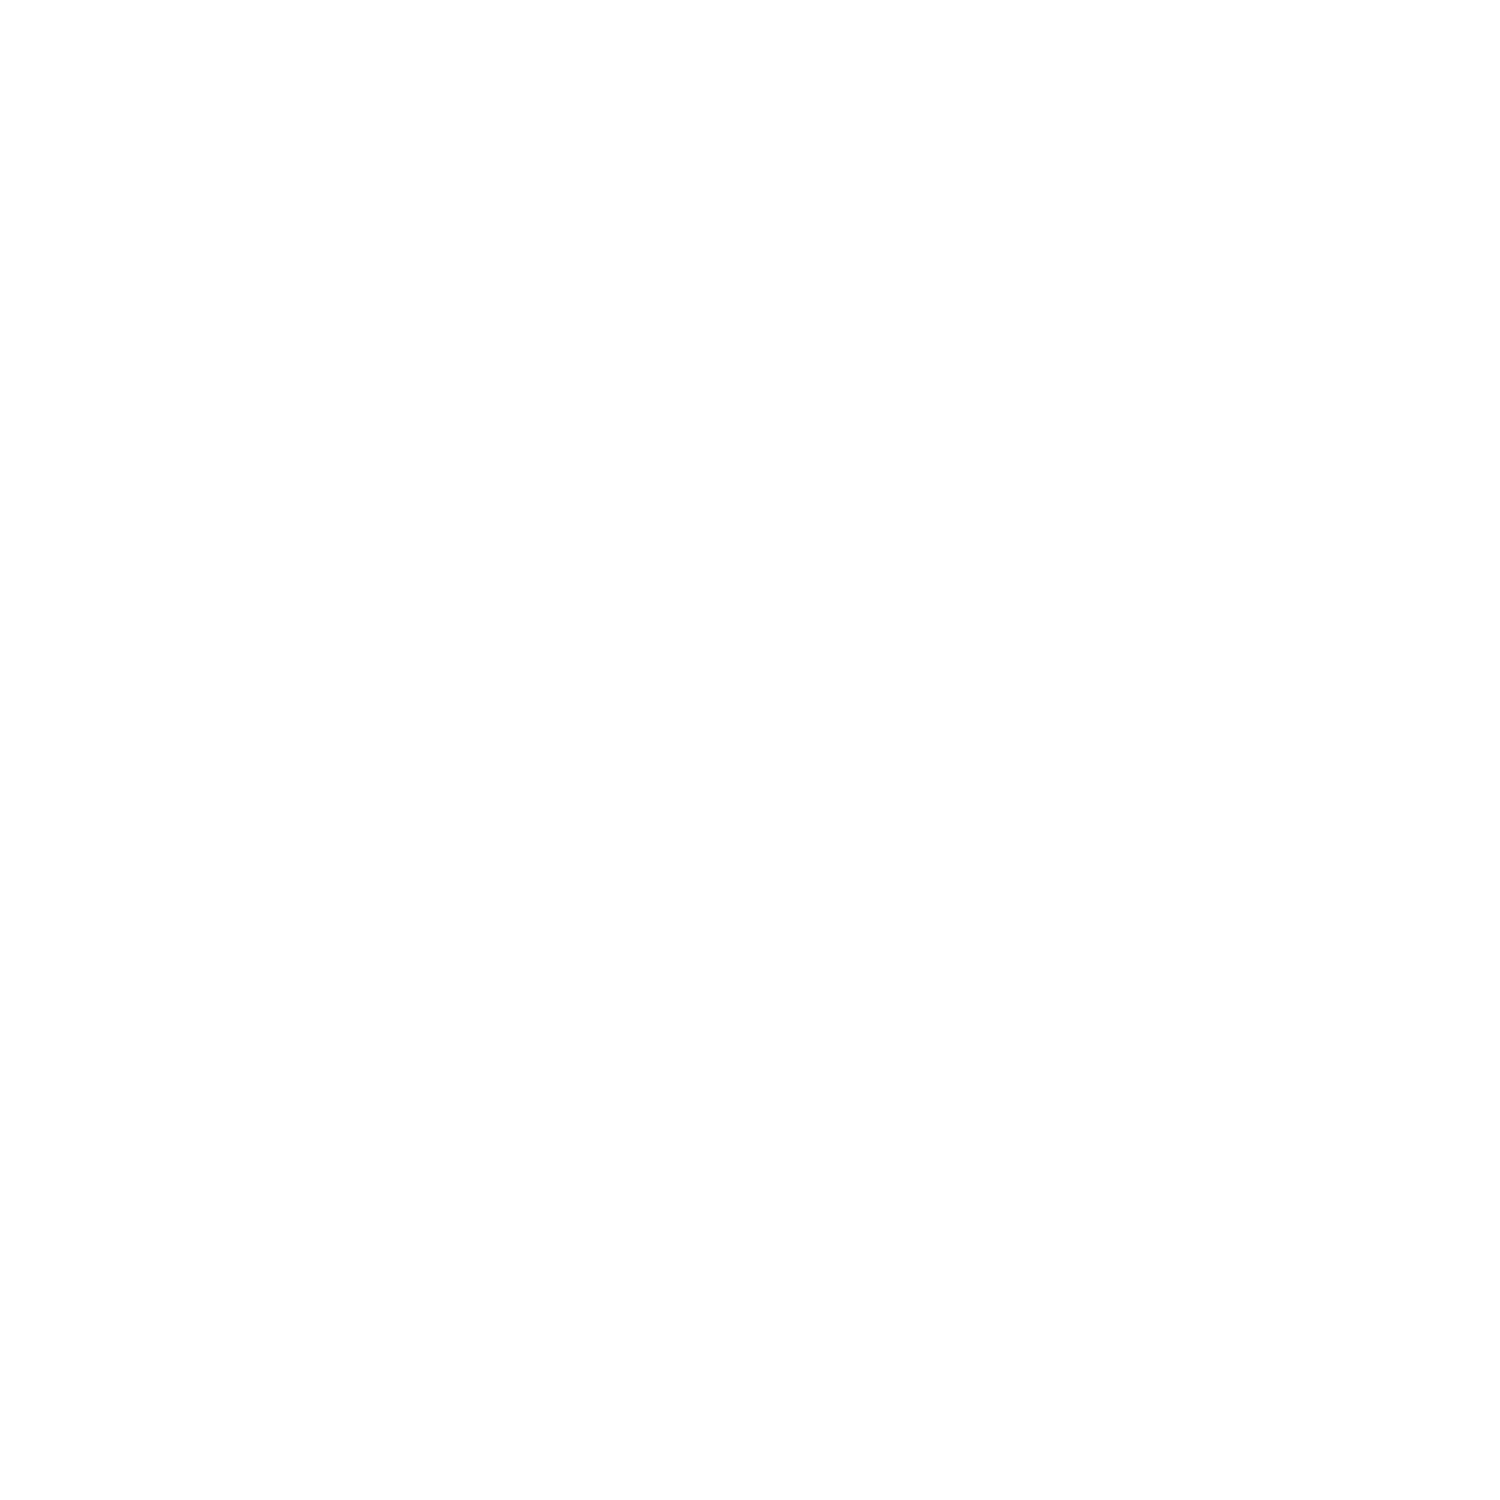

<IPython.core.display.Javascript object>


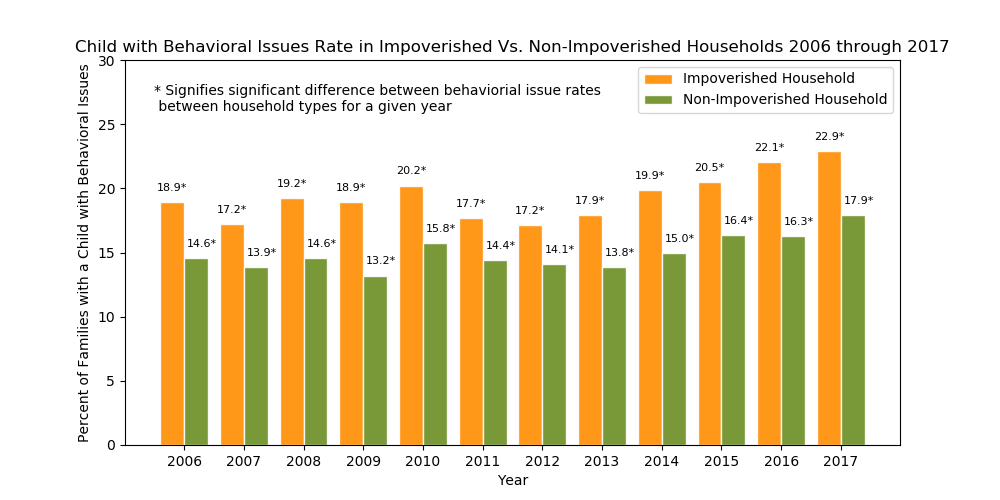

In [30]:
plt.figure(figsize=(15,15))

# Set x axis and tick locations()
x_axis = np.arange(2006,2018)
tick_locations = [value for value in x_axis]

# set bar width
barwidth = 0.4

# set height of bar
pov_behavior_bar = all_years["Concentration/Emotional/Behavior Rate in Impoverished HH"].tolist()
nonpov_behavior_bar = all_years["Concentration/Emotional/Behavior Rate in Non-Impoverished HH"].tolist()
siglist = all_years["Concentration/Emotional/Behavior Difference Significant for Poverty Status"].tolist()

# set position of the bar on the x-axis
r1 = [x - 0.5*barwidth for x in tick_locations]
r2 = [x + 0.5*barwidth for x in tick_locations]

plt.figure(figsize=(10,5))
plt.bar(r1, pov_behavior_bar, color='darkorange', alpha = 0.9, align="center", width=barwidth, edgecolor = 'white', label="Impoverished Household")
plt.bar(r2, nonpov_behavior_bar, color='olivedrab', alpha = 0.9, align="center", width=barwidth, edgecolor = 'white', label="Non-Impoverished Household")
plt.xticks(tick_locations,all_years['Year'].tolist())
plt.title("Child with Behavioral Issues Rate in Impoverished Vs. Non-Impoverished Households 2006 through 2017")
plt.ylim(0,30)

plt.legend()

place = -1

for x,y in zip(x_axis,pov_behavior_bar):

    place = place + 1
    
    if siglist[place]=="Yes":
        label = "{:.1f}*".format(y)
    else:
        label = "{:.1f}".format(y)

    plt.annotate(label, # this is the text
                 (r1[place],y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,8), # distance from text to points (x,y)
                 ha='center',
                 fontsize=8) # horizontal alignment can be left, right or center

place = -1

for x,y in zip(x_axis,nonpov_behavior_bar):

    place = place + 1
    
    if siglist[place]=="Yes":
        label = "{:.1f}*".format(y)
    else:
        label = "{:.1f}".format(y)

    plt.annotate(label, # this is the text
                 (r2[place]+0.1,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,8), # distance from text to points (x,y)
                 ha='center',
                 fontsize=8) # horizontal alignment can be left, right or center
plt.text(2005.5,26,"* Signifies significant difference between behaviorial issue rates \n between household types for a given year",
        fontsize=10)
plt.xlabel("Year")
plt.ylabel("Percent of Families with a Child with Behavioral Issues")

# Save the Figure
plt.savefig(f"../Images/BehaviorVsPoverty.png")

plt.show()